# 1. 데이터 탐색 및 기본 탐색(총 30 점)

A. 데이터셋을 로드하고 처음 5 개의 행을 출력하라(10).  
B. 각 열의 데이터 타입과 결측치의 수를 확인하라(10).  
C. 각 정당별로 평균 지지도를 계산하라(10).  

In [1]:
import pandas as pd
df = pd.read_csv("Political_Party_Survey_Data.csv")

df.head()

,지역,정당,지지도,호감도,비호감도,당원수,지난 선거 득표율,여성 당원 비율,공약 이행율,지역 환경 공약 이행율,지역 복지 공약 이행율,지역 투자 공약 이행율
0,서울,당 A,61.0,18,18,640.0,30.114590,35.831795,52.180189,93.020231,90.345649,56.384486
1,서울,당 B,24.0,99,97,NaN,23.172628,23.041459,99.727526,62.512568,67.315216,62.500822
2,서울,당 C,81.0,62,10,624.0,7.920151,59.812685,73.497226,51.941737,73.233691,79.027201
3,부산,당 A,70.0,11,17,259.0,16.426194,58.270968,63.978017,65.163276,82.488684,93.355830
4,부산,당 B,30.0,93,97,938.0,16.109423,37.914673,94.174701,76.854121,52.402946,78.093335


In [2]:
df.isnull().sum()

지역               0
정당               0
지지도              0
호감도              0
비호감도             0
당원수             10
지난 선거 득표율        0
여성 당원 비율         0
공약 이행율           0
지역 환경 공약 이행율     0
지역 복지 공약 이행율     0
지역 투자 공약 이행율     0
dtype: int64

In [3]:
df.groupby('정당')['지지도'].mean()

정당
당 A    65.882353
당 B    52.147059
당 C    57.647059
Name: 지지도, dtype: float64

# 2. 데이터 정제 및 변환(총 30 점)

A. 각 당의 데이터를 분리하여 세 DataFrame 으로 분할하고 각각의 첫 다섯 행을
출력하라(10)  
B. 당원수에 결측치가 있는 행을 각 정당별로 지역별 당원수의 평균값으로 채워라. 즉
정당 A 의 당원수 결측치는 해당 정당의 지역별 당원수의 평균값으로 채워져야
한다(10).  
C. 코드를 이용해 데이터를 검토하고, 이상치로 판단되는 내용이 있다면 이를
수정하되, 이상치로 판단하는 근거를 설명하라(10).


In [4]:
df_party_A = df[df['정당'] == '당 A']
df_party_B = df[df['정당'] == '당 B']
df_party_C = df[df['정당'] == '당 C']

print(df_party_A.head())
print(df_party_B.head())
print(df_party_C.head())

    지역   정당    지지도  호감도  비호감도    당원수  지난 선거 득표율   여성 당원 비율     공약 이행율  \
0   서울  당 A   61.0   18    18  640.0  30.114590  35.831795  52.180189   
3   부산  당 A   70.0   11    17  259.0  16.426194  58.270968  63.978017   
6   대구  당 A  144.0   80    20  342.0  37.052177  19.435355  97.653592   
9   인천  당 A   97.0   56    44  677.0  17.005146  52.333057  78.614623   
12  광주  당 A   31.0   90    14  673.0   6.487283  54.388505  65.284851   

    지역 환경 공약 이행율  지역 복지 공약 이행율  지역 투자 공약 이행율  
0      93.020231     90.345649     56.384486  
3      65.163276     82.488684     93.355830  
6      91.393450     94.334019     83.992239  
9      72.863258     96.671815     68.886444  
12     70.567695     84.198188     69.480904  
    지역   정당   지지도  호감도  비호감도    당원수  지난 선거 득표율   여성 당원 비율     공약 이행율  \
1   서울  당 B  24.0   99    97    NaN  23.172628  23.041459  99.727526   
4   부산  당 B  30.0   93    97  938.0  16.109423  37.914673  94.174701   
7   대구  당 B  84.0   53    90  185.0  11.663912  23.943568  66.5

In [5]:
df['당원수'] = df.groupby('정당')['당원수'].transform(lambda x: x.fillna(x.mean()))

In [6]:
df.isnull().sum()

지역              0
정당              0
지지도             0
호감도             0
비호감도            0
당원수             0
지난 선거 득표율       0
여성 당원 비율        0
공약 이행율          0
지역 환경 공약 이행율    0
지역 복지 공약 이행율    0
지역 투자 공약 이행율    0
dtype: int64

In [7]:
df.describe()

,지지도,호감도,비호감도,당원수,지난 선거 득표율,여성 당원 비율,공약 이행율,지역 환경 공약 이행율,지역 복지 공약 이행율,지역 투자 공약 이행율
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,58.558824,58.549020,49.803922,594.583333,28.098498,39.321002,72.571150,71.277571,77.587569,76.709924
std,29.959080,27.914379,29.180144,201.440367,12.438876,13.276860,14.945661,15.028494,13.498796,14.865470
min,11.000000,11.000000,10.000000,127.000000,6.487283,10.903768,50.259243,50.858055,50.765227,52.674265
25%,30.500000,36.500000,22.000000,452.500000,16.715670,28.468789,61.577059,58.349418,67.366023,62.215333
50%,62.000000,62.000000,44.000000,643.800000,28.298811,38.600210,69.734573,69.941045,78.796229,77.295789
75%,81.500000,82.000000,73.000000,735.500000,37.026953,52.439740,83.579241,84.700303,88.314926,90.456498
max,144.000000,99.000000,99.000000,938.000000,49.898322,59.812685,99.727526,98.975526,98.379028,99.796562


명확하게 이상치로 판단되는 내용은 없으나, 지지도나 당원수를 보았을때 평균과,상위 75%를 고려하였을때 max값이 지나치게 높아 이상치로 추정해 볼 수 있다. 이는 시각화를 통해 더 정확하게 확인해야할 것 같다.



# 3.데이터 시각화(총 40 점)

A. 막대 그래프와 hue 를 이용하여, 각 지역별 정당 지지도를 시각화하라(15).   
B. 당 B 의 공약 이행율과 지역 공학 이행율을 사이의 관계를 산점도로 나타내고 이를
평가하라(15).   
C. 꺾은선 그래프를 이용해, 당 C 의 지역별 환경/복지/투자 공약 이행율을
나타내라.(10)    

In [8]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import seaborn as sns

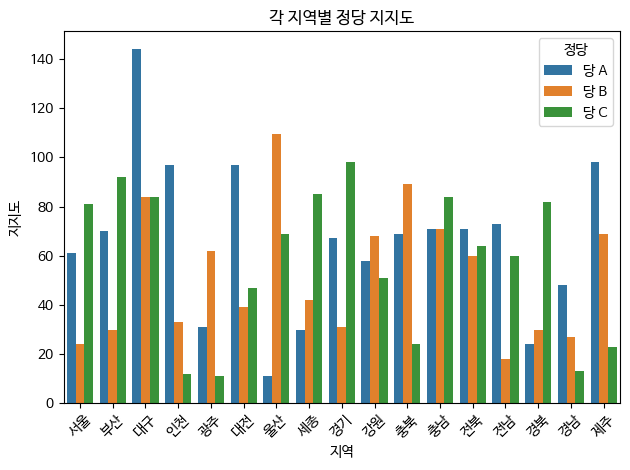

In [10]:
sns.barplot(data=df, x='지역', y='지지도', hue='정당')
plt.title('각 지역별 정당 지지도')
plt.xlabel('지역')
plt.ylabel('지지도')
plt.xticks(rotation=45)
plt.legend(title='정당')
plt.tight_layout()
plt.show()

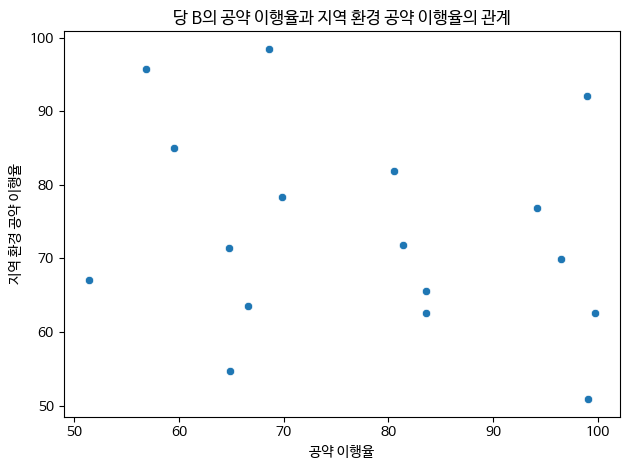

In [11]:
sns.scatterplot(data=df[df['정당'] == '당 B'], x='공약 이행율', y='지역 환경 공약 이행율')
plt.title('당 B의 공약 이행율과 지역 환경 공약 이행율의 관계')
plt.xlabel('공약 이행율')
plt.ylabel('지역 환경 공약 이행율')
plt.tight_layout()
plt.show()

공약 이행율과 지역 환경 공약 이행율과는 특별한 관계가 없다.

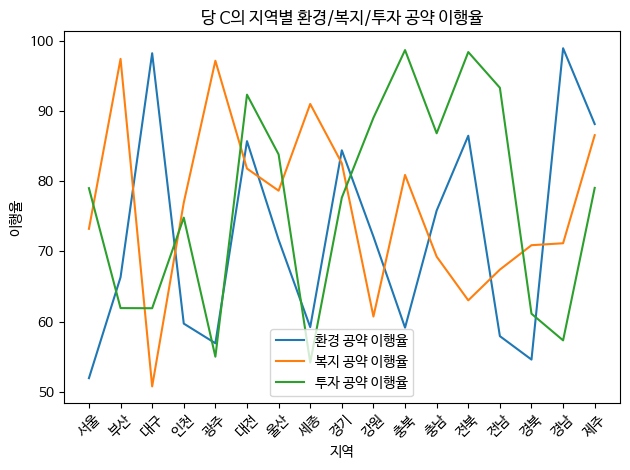

In [12]:
sns.lineplot(data=df[df['정당'] == '당 C'], x='지역', y='지역 환경 공약 이행율', label='환경 공약 이행율')
sns.lineplot(data=df[df['정당'] == '당 C'], x='지역', y='지역 복지 공약 이행율', label='복지 공약 이행율')
sns.lineplot(data=df[df['정당'] == '당 C'], x='지역', y='지역 투자 공약 이행율', label='투자 공약 이행율')
plt.title('당 C의 지역별 환경/복지/투자 공약 이행율')
plt.xlabel('지역')
plt.ylabel('이행율')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()